# ARIMA Model

In [ ]:
from datetime import datetime, timedelta, date
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import time
import yfinance as yf

In [ ]:
stock_symbol = "BA"
end_date = date.today()
start_date = end_date - timedelta(days=365 * 5)  # 5 years

df_b = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
close = df_b['Close']
close = close.dropna()
returns = close.diff()[1:]

Text(0.5, 1.0, 'BA Returns')

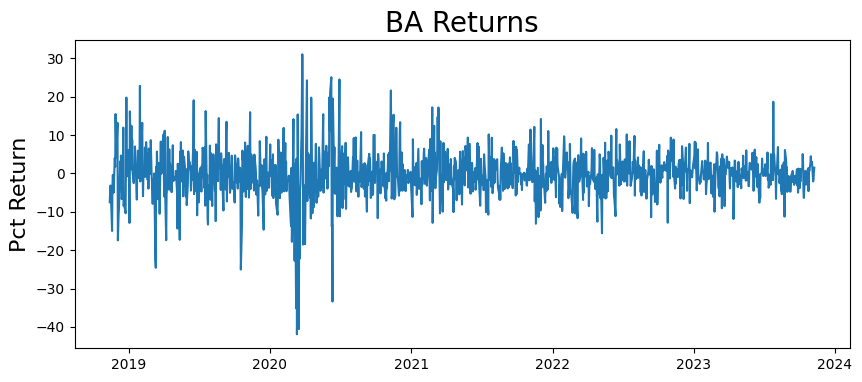

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BA Returns', fontsize=20)

In [ ]:
train, test = returns[:-60], returns[-60:]

### ACF

<BarContainer object of 15 artists>

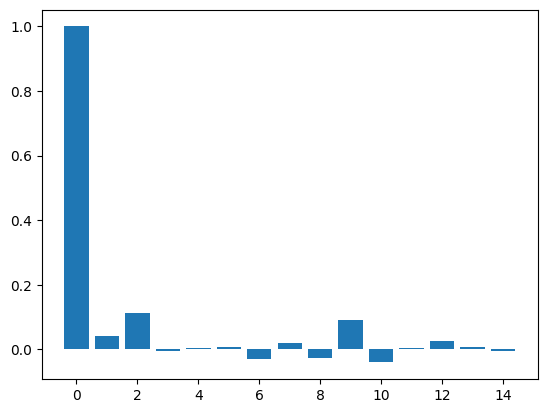

In [ ]:
acf_vals = acf(train)
plt.bar(range(15), acf_vals[:15])

MA(1)

### PACF

<BarContainer object of 15 artists>

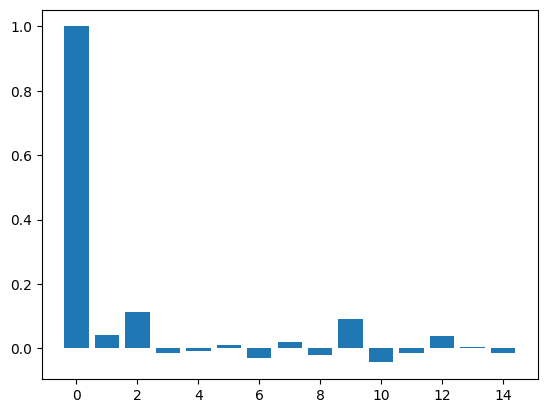

In [ ]:
pacf_vals = pacf(train)
plt.bar(range(15), pacf_vals[:15])

AR(1)

### model

In [ ]:
model = ARIMA(train, order=(1,0,1))

#fit the model
start = time.time()
model_fit = model.fit()
end = time.time()
print('Model Fitting Time:', end - start)

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model Fitting Time: 1.047912836074829
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1196
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3926.857
Date:                Fri, 10 Nov 2023   AIC                           7861.715
Time:                        23:53:08   BIC                           7882.062
Sample:                             0   HQIC                          7869.381
                               - 1196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1089      0.227     -0.480      0.631      -0.554       0.336
ar.L1          0.6576      0.098      6.701      0.000       0.465       0.850
ma.L1         

<Axes: xlabel='Date'>

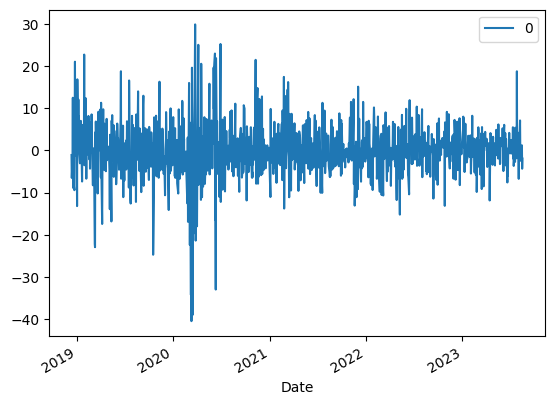

In [ ]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid[20:])
residuals.plot()

                 0
count  1176.000000
mean      0.021948
std       6.416935
min     -40.499176
25%      -3.126879
50%      -0.032235
75%       3.097940
max      29.854259


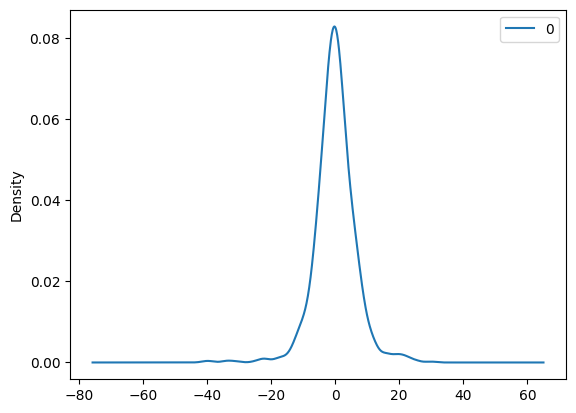

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
# summary stats of residuals
print(residuals.describe())

### Validation

In [ ]:
train = [x for x in train]
test = [x for x in test]

predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(train, order=(1,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output
	predictions.append(yhat)
	obs = test[t]
	train.append(obs)

Test RMSE: 9.614


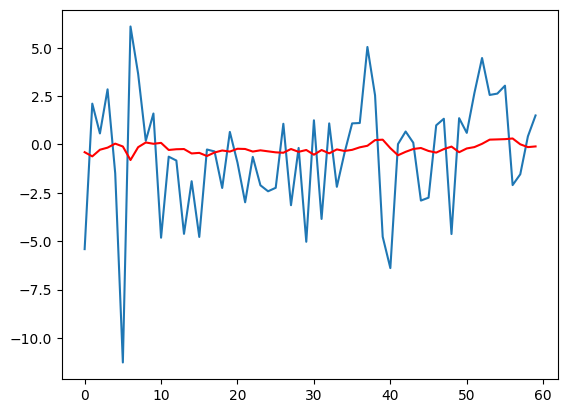

In [ ]:
mse = (mean_squared_error(test, predictions))
print('Test MSE: %.3f' % mse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()